# Создаем модель предсказания кода ОКПО-2 Random Forest с помощью метода векторизации "Мешок слов" (Bag of Words).

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import csv

# Шаг 1: Загружаем данные
file_path = 'D:\\new_fz_output_final.csv'
df = pd.read_csv(file_path)

# Убедимся, что в данных нет пропусков
df.dropna(subset=['Описание', 'Код_ОКПО-2'], inplace=True)

# Шаг 2: Разделяем данные на обучающую и тестовую выборки
X = df['Описание']
y = df['Код_ОКПО-2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Шаг 3: Преобразуем текстовые данные в векторы
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Шаг 4: Создаем и обучаем модель
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vec, y_train)

# Шаг 5: Делаем предсказания и оцениваем модель
y_pred = model.predict(X_test_vec)

# Выводим результаты
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9005824965157417
Classification Report:
               precision    recall  f1-score   support

          41       0.91      0.65      0.76      9352
          42       0.92      0.92      0.92     24032
          43       0.86      0.92      0.89     32483
          71       0.95      0.96      0.96     18082

    accuracy                           0.90     83949
   macro avg       0.91      0.86      0.88     83949
weighted avg       0.90      0.90      0.90     83949



# Создаем модель предсказания кода ОКПО-2 Random Forest с помощью метода векторизации "TF-IDF".

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Загрузка данных
file_path = 'D:\\new_fz_output_final.csv'
df = pd.read_csv(file_path)
    
# Убедимся, что в данных нет пропусков
df.dropna(subset=['Описание', 'Код_ОКПО-2'], inplace=True)
    
# Разделяем данные на признаки и целевую переменную
X = df['Описание']
y = df['Код_ОКПО-2']

# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Инициализация и применение TF-IDF векторизатора
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
    
# Инициализация и обучение модели
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)
    
# Предсказание на тестовых данных
y_pred = model.predict(X_test_tfidf)

# Оценка производительности модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8952340111258026
Classification Report:
               precision    recall  f1-score   support

          41       0.91      0.62      0.74      9352
          42       0.91      0.91      0.91     24032
          43       0.85      0.92      0.88     32483
          71       0.95      0.97      0.96     18082

    accuracy                           0.90     83949
   macro avg       0.91      0.86      0.87     83949
weighted avg       0.90      0.90      0.89     83949



# Создаем модель предсказания кода ОКПО-2 Random Forest с помощью метода векторизации "Word2vec".

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from gensim.models import Word2Vec
import numpy as np
    
# Загрузка данных
file_path = 'D:\\new_fz_output_final.csv'
df = pd.read_csv(file_path)
    
# Убедимся, что в данных нет пропусков
df.dropna(subset=['Описание', 'Код_ОКПО-2'], inplace=True)
    
# Разделяем данные на признаки и целевую переменную
X = df['Описание']
y = df['Код_ОКПО-2']
    
# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Подготовка текстовых данных для Word2Vec
# Преобразуем текст в список списков токенов
X_train_tokens = [doc.split() for doc in X_train]
X_test_tokens = [doc.split() for doc in X_test]
    
# Обучение модели Word2Vec
w2v_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4)
    
# Функция для преобразования предложения в вектор среднего слова
def document_vector(doc):
    # Получаем векторы для токенов
    vectors = [w2v_model.wv[word] for word in doc if word in w2v_model.wv]
    # Возвращаем средний вектор
    if len(vectors) == 0:
        return np.zeros(w2v_model.vector_size)
    return np.mean(vectors, axis=0)
    
# Применяем функцию к обучающим и тестовым данным
X_train_w2v = np.array([document_vector(doc) for doc in X_train_tokens])
X_test_w2v = np.array([document_vector(doc) for doc in X_test_tokens])
    
# Инициализация и обучение модели
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_w2v, y_train)
    
# Предсказание на тестовых данных
y_pred = model.predict(X_test_w2v)
    
# Оценка производительности модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8748764130603104
Classification Report:
               precision    recall  f1-score   support

          41       0.92      0.59      0.72      9352
          42       0.89      0.90      0.90     24032
          43       0.83      0.91      0.87     32483
          71       0.94      0.92      0.93     18082

    accuracy                           0.87     83949
   macro avg       0.89      0.83      0.85     83949
weighted avg       0.88      0.87      0.87     83949



# Построение 4-х слойной сверточной модели нейронной сети с использованием библиотеки TensorFlow из Keras.

Epoch 1/10
10494/10494 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.3589 - loss: 49.1307 - val_accuracy: 0.3869 - val_loss: 1.3011
Epoch 2/10
10494/10494 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.3884 - loss: 1.3024 - val_accuracy: 0.3869 - val_loss: 1.3013
Epoch 3/10
10494/10494 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.3883 - loss: 1.3016 - val_accuracy: 0.3869 - val_loss: 1.3007
Epoch 4/10
10494/10494 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.3894 - loss: 1.3013 - val_accuracy: 0.3869 - val_loss: 1.3009
Epoch 5/10
10494/10494 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.3894 - loss: 1.3010 - val_accuracy: 0.3869 - val_loss: 1.3008
Epoch 6/10
10494/10494 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.3896 - loss: 1.3007 - val_accuracy: 0.3869 - val_loss: 1.3007
Epoch 7/10
10494/10494 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.3889 - loss: 1.3002 - val_accuracy: 0.3869 - val_loss: 1.3009
Epoch 8/10
10494/10494 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy:

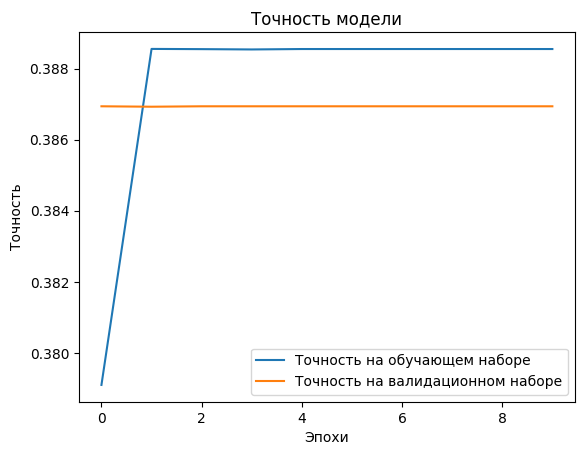

2624/2624 ━━━━━━━━━━━━━━━━━━━━ 2s 754us/step
              precision    recall  f1-score   support

          41       0.00      0.00      0.00      9352
          42       0.00      0.00      0.00     24032
          43       0.39      1.00      0.56     32483
          71       0.00      0.00      0.00     18082

    accuracy                           0.39     83949
   macro avg       0.10      0.25      0.14     83949
weighted avg       0.15      0.39      0.22     83949



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
    
# Импорт необходимых модулей из TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
    
# Загрузка данных
data = pd.read_csv('D:\\new_fz_output_final.csv')  # Считываем данные из файла
    
# Предобработка данных
X = data['Описание']  # Текстовые данные
y = data['Код_ОКПО-2']  # Метки ОКПО-2
    
# Кодирование меток
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
    
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
    
# Токенизация текста
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
    
# Паддинг последовательностей
max_length = max(len(x) for x in X_train_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')
    
# Создание модели
model = Sequential()
model.add(Input(shape=(max_length,)))  # Указываем форму входных данных
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))  # Количество классов
    
# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
# Обучение модели
epochs = 10  # Измените количество эпох по мере необходимости
history = model.fit(X_train_padded, y_train, epochs=epochs, batch_size=32, validation_data=(X_test_padded, y_test))
    
# Оценка модели на тестовом наборе данных 
loss, accuracy = model.evaluate(X_test_padded, y_test)
    
# Вывод результатов
print(f"Потери модели: {loss:.4f}")
print(f"Точность модели: {accuracy:.4f}")
    
# Построение графика точности
plt.plot(history.history['accuracy'], label='Точность на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Точность на валидационном наборе')
plt.title('Точность модели')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()
    
# Предсказания
y_pred = np.argmax(model.predict(X_test_padded), axis=-1)
    
# Отчёт о классификации
print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in label_encoder.classes_], zero_division=0))

# Построение нейронной 4-х слойной модели c использованием библиотеки TensorFlow из Keras.

Epoch 1/10
4198/4198 ━━━━━━━━━━━━━━━━━━━━ 131s 31ms/step - accuracy: 0.3985 - loss: 1.2829 - val_accuracy: 0.4180 - val_loss: 1.2341
Epoch 2/10
4198/4198 ━━━━━━━━━━━━━━━━━━━━ 130s 31ms/step - accuracy: 0.4163 - loss: 1.2394 - val_accuracy: 0.4196 - val_loss: 1.2303
Epoch 3/10
4198/4198 ━━━━━━━━━━━━━━━━━━━━ 143s 31ms/step - accuracy: 0.4205 - loss: 1.2301 - val_accuracy: 0.4240 - val_loss: 1.2202
Epoch 4/10
4198/4198 ━━━━━━━━━━━━━━━━━━━━ 132s 31ms/step - accuracy: 0.6130 - loss: 0.8799 - val_accuracy: 0.8548 - val_loss: 0.3922
Epoch 5/10
4198/4198 ━━━━━━━━━━━━━━━━━━━━ 133s 32ms/step - accuracy: 0.8524 - loss: 0.4009 - val_accuracy: 0.8626 - val_loss: 0.3728
Epoch 6/10
4198/4198 ━━━━━━━━━━━━━━━━━━━━ 134s 32ms/step - accuracy: 0.8625 - loss: 0.3720 - val_accuracy: 0.8658 - val_loss: 0.3600
Epoch 7/10
4198/4198 ━━━━━━━━━━━━━━━━━━━━ 135s 32ms/step - accuracy: 0.8679 - loss: 0.3583 - val_accuracy: 0.8669 - val_loss: 0.3567
Epoch 8/10
4198/4198 ━━━━━━━━━━━━━━━━━━━━ 137s 33ms/step - accuracy: 

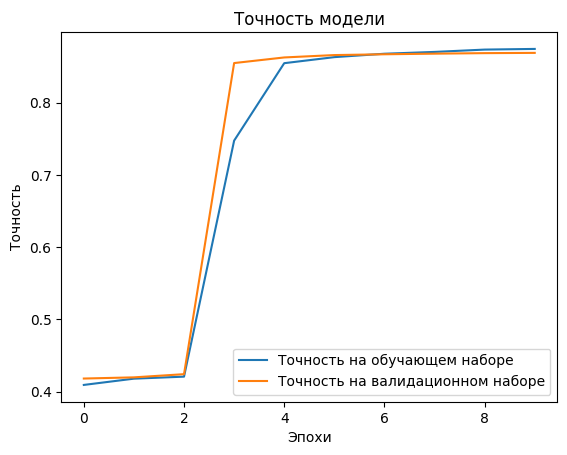

2624/2624 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step
              precision    recall  f1-score   support

           0       0.80      0.61      0.69      9352
           1       0.88      0.90      0.89     24032
           2       0.84      0.87      0.85     32483
           3       0.95      0.97      0.96     18082

    accuracy                           0.87     83949
   macro avg       0.87      0.84      0.85     83949
weighted avg       0.87      0.87      0.87     83949



In [15]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
    
# Установите параметры
MAX_FEATURES = 10000  # Максимальное количество уникальных слов
MAX_SEQUENCE_LENGTH = 50  # Максимальная длина последовательностей
EMBEDDING_DIM = 100  # Размерность векторного представления слов
DROPOUT_RATE = 0.5  # Вероятность dropout
    
# Загрузка данных
data = pd.read_csv('D:\\new_fz_output_final.csv')  # Считываем данные из файла
    
# Предобработка данных
X = data['Описание']  # Текстовые данные
y = data['Код_ОКПО-2']  # Метки ОКПО-2
    
# Преобразование меток в целые числа
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
    
# Токенизация текстов
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
    
# Разделите данные на обучающий и тестовый наборы\n",
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y, test_size=0.2, random_state=42)
    
# Паддинг последовательностей
X_train_padded = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_test_padded = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
    
# Создание модели
model = Sequential()
model.add(Embedding(input_dim=MAX_FEATURES, output_dim=EMBEDDING_DIM))#, #input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(DROPOUT_RATE))
model.add(LSTM(100, dropout=DROPOUT_RATE, recurrent_dropout=DROPOUT_RATE))
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Измените количество выходов в зависимости от ваших классов
    
# Компиляция модели
adam = Adam(learning_rate=0.001)  # Оптимизатор Adam с заданной скоростью обучения
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
# Обучение модели
epochs = 10  # Измените количество эпох по мере необходимости
history = model.fit(X_train_padded, y_train, epochs=epochs, batch_size=64, validation_split=0.2)
    
# Оценка модели
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Потери модели: {loss:.4f}")
print(f"Точность модели: {accuracy:.4f}")
    
# Построение графика точности
plt.plot(history.history['accuracy'], label='Точность на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Точность на валидационном наборе')
plt.title('Точность модели')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()
    
# Предсказания
y_pred = np.argmax(model.predict(X_test_padded), axis=-1)
    
# Отчёт о классификации
print(classification_report(y_test, y_pred))